In [1]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
import numpy as np
from torch import FloatTensor
import matplotlib.pyplot as plt
import torch
import pandas as pd

have a 2d gaussian distribution with 0 mean and I covariance matrix. 
add a 3rd feature whos value is (1,2,3) if normal and (18, 91, 20) if outlier.

In [2]:
np.random.seed(42)

# Parameters
num_groups = 20
num_points_per_group = 25
num_features = 3  # Two Gaussian features + one label
num_normal = 18
num_anomalous = 2

# Generate data
dataset = []
for i in range(num_groups):
    if i < num_normal:
        label = np.random.choice([1, 2, 3])  
    else:
        label = np.random.choice([18, 19, 20]) 
    points = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=num_points_per_group)
    feature_3 = np.full((num_points_per_group, 1), label)  # Feature 3 as a column
    group_data = np.hstack([points, feature_3]) 
    dataset.append(group_data)

# Convert dataset into a 3D NumPy array
final_dataset = np.array(dataset)  

In [3]:
final_dataset

array([[[-5.50234489e-01,  5.15433072e-01,  3.00000000e+00],
        [ 4.73860834e-01,  1.36845012e+00,  3.00000000e+00],
        [-9.16826844e-01, -1.24147180e-01,  3.00000000e+00],
        ...,
        [ 7.85532124e-01,  2.65601009e+00,  3.00000000e+00],
        [ 2.63486040e-01,  1.64177112e+00,  3.00000000e+00],
        [ 4.60816300e-01,  8.59234716e-02,  3.00000000e+00]],

       [[ 3.24083969e-01, -3.85082280e-01,  1.00000000e+00],
        [-6.76922000e-01,  6.11676289e-01,  1.00000000e+00],
        [ 1.03099952e+00,  9.31280119e-01,  1.00000000e+00],
        ...,
        [-3.92108153e-01, -1.46351495e+00,  1.00000000e+00],
        [ 2.96120277e-01,  2.61055272e-01,  1.00000000e+00],
        [ 5.11345664e-03, -2.34587133e-01,  1.00000000e+00]],

       [[ 1.94511561e+00, -1.53336458e-01,  1.00000000e+00],
        [-9.06987225e-01, -8.17354155e-01,  1.00000000e+00],
        [-4.83122679e-01, -5.69828348e-01,  1.00000000e+00],
        ...,
        [ 4.81979139e-01,  9.26456359e-01,

In [4]:
classifier = OneClassSMMClassifier(nu=0.1)
# classifier = OneClassSMM(0.1, 0.3)

In [5]:
classifier.fit(final_dataset)

In [6]:
decision, y_pred = classifier.predict(final_dataset)

[0.72726881]


In [7]:
count_neg_1 = np.count_nonzero(y_pred == -1)
count_pos_1 = np.count_nonzero(y_pred == 1)

print(f"Count of -1: {count_neg_1}")
print(f"Count of +1: {count_pos_1}")

Count of -1: 2
Count of +1: 18


In [8]:
decision

array([ 1.64769762,  1.68378281,  1.6693745 ,  1.73534109,  1.60930517,
        1.70120601,  1.74316104,  1.94468049,  2.19008366,  1.6693756 ,
        1.66277869,  1.42827694,  2.32089818,  1.507998  ,  1.60127289,
        1.88315064,  1.30721732,  1.87350562, -0.3780793 , -0.23778633])

In [9]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[18, 19]

In [10]:
tensor_datasets = torch.tensor(final_dataset)
tensor_datasets

tensor([[[-5.5023e-01,  5.1543e-01,  3.0000e+00],
         [ 4.7386e-01,  1.3685e+00,  3.0000e+00],
         [-9.1683e-01, -1.2415e-01,  3.0000e+00],
         ...,
         [ 7.8553e-01,  2.6560e+00,  3.0000e+00],
         [ 2.6349e-01,  1.6418e+00,  3.0000e+00],
         [ 4.6082e-01,  8.5923e-02,  3.0000e+00]],

        [[ 3.2408e-01, -3.8508e-01,  1.0000e+00],
         [-6.7692e-01,  6.1168e-01,  1.0000e+00],
         [ 1.0310e+00,  9.3128e-01,  1.0000e+00],
         ...,
         [-3.9211e-01, -1.4635e+00,  1.0000e+00],
         [ 2.9612e-01,  2.6106e-01,  1.0000e+00],
         [ 5.1135e-03, -2.3459e-01,  1.0000e+00]],

        [[ 1.9451e+00, -1.5334e-01,  1.0000e+00],
         [-9.0699e-01, -8.1735e-01,  1.0000e+00],
         [-4.8312e-01, -5.6983e-01,  1.0000e+00],
         ...,
         [ 4.8198e-01,  9.2646e-01,  1.0000e+00],
         [-8.3758e-01,  6.7719e-01,  1.0000e+00],
         [ 1.8723e+00,  3.9637e-01,  1.0000e+00]],

        ...,

        [[-6.4855e-01,  8.0186e-01,  2

In [11]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=tensor_datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=tensor_datasets, num_coalitions=2**tensor_datasets[0].shape[1])

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 21.31it/s]


In [12]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [13]:
mean_stochastic_shapley_values

tensor([[ 0.4741,  0.7090,  0.3847, -0.2620,  0.5221,  0.4194,  0.3756,  0.2273,
          0.2812,  0.6887,  0.6179,  0.1154,  0.6469,  0.3459,  0.2970, -0.0497,
         -0.1574,  0.9839, -0.7019, -0.1957],
        [ 0.1132,  0.7272,  0.3765,  0.6461,  0.4201,  0.4455, -0.0731,  0.5537,
          0.2633,  0.0523,  0.3324,  0.4476,  0.4497,  0.3100,  0.4363,  0.5633,
          0.4945,  0.7354, -0.4105, -0.7628],
        [ 0.5728,  0.5317,  0.3992,  0.3252,  0.6449,  0.2976,  0.0646,  1.1074,
          0.8470,  0.1745,  1.1264,  0.0433,  1.2855,  0.6180,  0.4279,  0.2719,
          0.3388,  1.6371, -2.2285, -2.3120]])

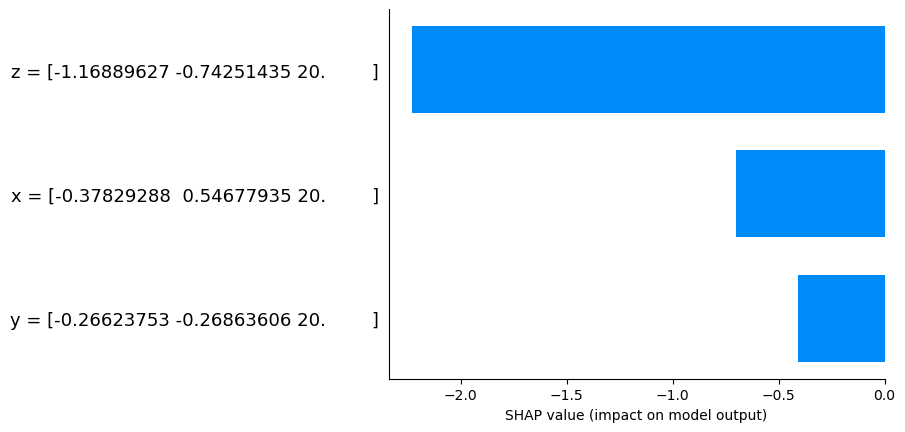

In [15]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot, violin_plot
bar_plot(mean_stochastic_shapley_values.T[18], tensor_datasets[18], feature_names=['x', 'y', 'z'])

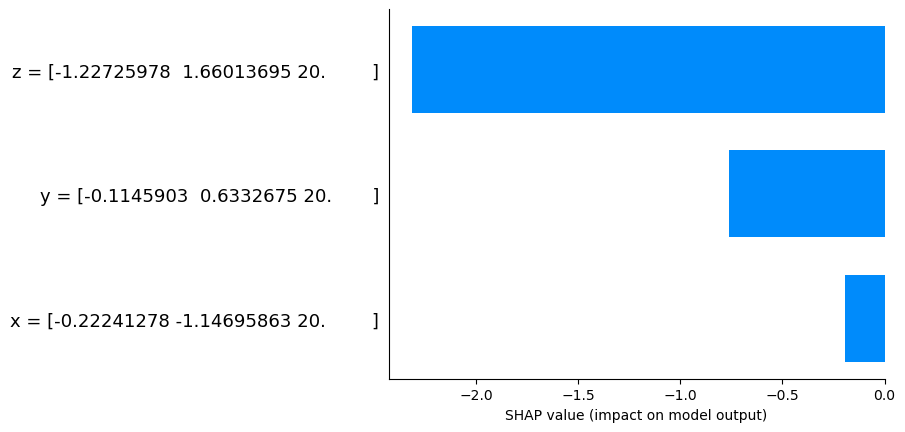

In [16]:
bar_plot(mean_stochastic_shapley_values.T[19], tensor_datasets[19], feature_names=['x', 'y', 'z'])

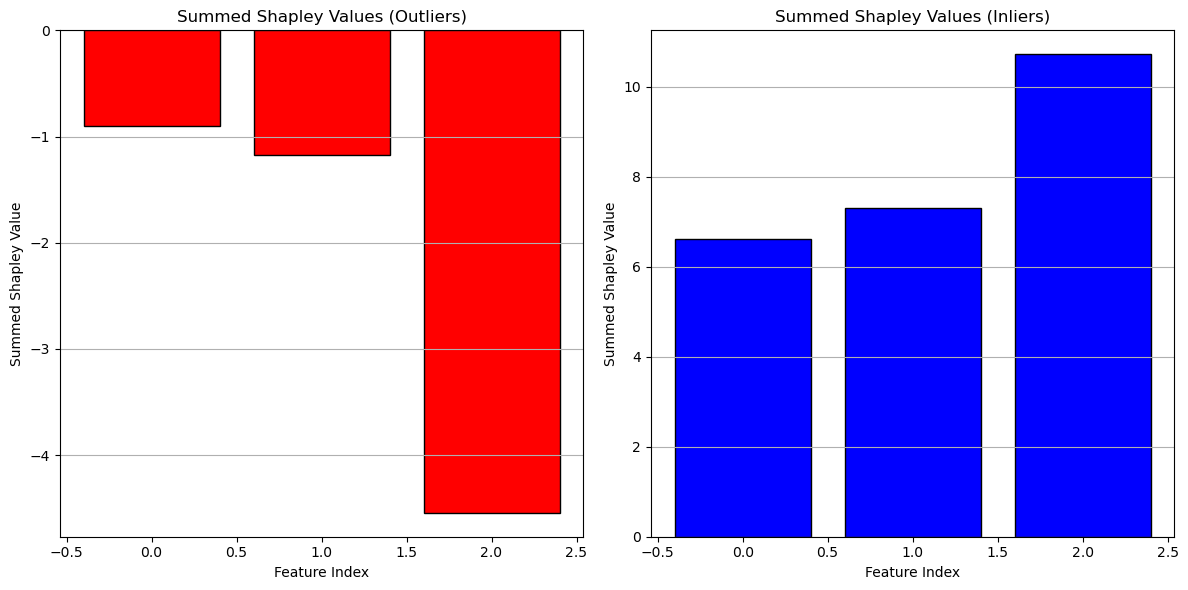

In [18]:
inlier_indices = [i for i in range(mean_stochastic_shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = mean_stochastic_shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = mean_stochastic_shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The most influential feature is the feature 3, which is causing the outlier prediction